#Name :: Siddhiraj R Kolwankar 

#*  The Spark Foundation  *

#DATA SCIENCE AND BUSINESS ANALYTICS

#Task 2 :: To predict optimum number of clusters and represent it visually using Unsupervised Machine Learning.

#Language :: Python




In [1]:
# importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans


In [2]:
# Loading the Dataset

iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:

x=iris_df.iloc[:,[0,1,2,3]].values
x


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# Finding optimal Value of Clusters

sse=[]
k_range=range(1,10)
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)

sse


[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.23730158730159,
 34.43410591944288,
 30.400007434594393,
 28.02497681266103]

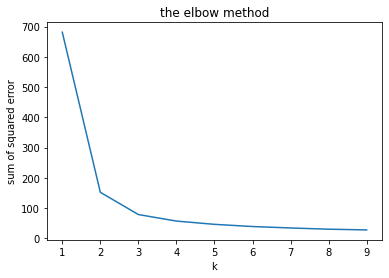

In [5]:
# Visualization of the Result using Elbow Method

plt.title('the elbow method')
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_range,sse)


Here we see that the optimal value of cluster for k means=3.

In [6]:

km=KMeans(n_clusters=3)
y_pred=km.fit_predict(x)


In [7]:

y_pred=pd.DataFrame(y_pred)


In [8]:

y_pred.columns=['predict']
y_pred.head()


,predict
0,1
1,1
2,1
3,1
4,1


In [9]:

y_pred['predict'].value_counts()


2    62
1    50
0    38
Name: predict, dtype: int64

In [10]:

iris_df['clusters']=y_pred
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [11]:

iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.160000
std,0.828066,0.435866,1.765298,0.762238,0.803349
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.250000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:

df=iris_df.copy()


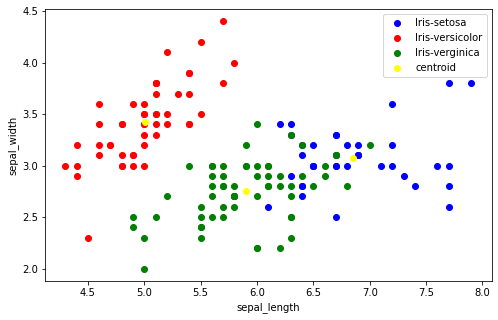

In [13]:

plt.figure(figsize=(8,5))
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',label='Iris-setosa')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',label='Iris-versicolor')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green',label='Iris-verginica')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.scatter(km.cluster_centers_[:,[0]],km.cluster_centers_[:,[1]],color='yellow',label='centroid')
plt.legend()






# Thank you!



